In [26]:
import pandas as pd
from glob import glob
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# getting all 2022 data and merge it

parquet_file_pattern = 'yellow_tripdata_2022-*.parquet'


parquet_file_list = glob(parquet_file_pattern)


all_data = pd.DataFrame()


for parquet_file in parquet_file_list:
    df = pd.read_parquet(parquet_file, engine='pyarrow')
    all_data = pd.concat([all_data, df], ignore_index=True)

KeyboardInterrupt: 

In [14]:
# getting just the jan data 
df = pd.read_parquet('yellow_tripdata_2022-01 (1).parquet', engine='pyarrow')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [6]:
def adding_extra_features(df: pd.DataFrame, pickup_date_column: str, dropoff_date_column: str) -> pd.DataFrame:
    """
    This function takes a DataFrame and adds extra features related to time, duration, and velocity.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing taxi trip data.
    - pickup_date_column (str): The name of the column containing pickup timestamps.
    - dropoff_date_column (str): The name of the column containing dropoff timestamps.

    Returns:
    - df (pd.DataFrame): The DataFrame with added features.

    Additional Features Added:
    - Time-related features for both pickup and dropoff timestamps (year, week, month, day of week, hour, minute, day of year).
    - Duration of the trip in minutes.
    - Velocity  of the trip in km per hour.
    """
    # Convert the pickup date column to a DatetimeIndex
    pickup_dt_index = pd.DatetimeIndex(df[pickup_date_column])
    
    # Convert the dropoff date column to a DatetimeIndex
    dropoff_dt_index = pd.DatetimeIndex(df[dropoff_date_column])
    
    # Add new columns to the DataFrame

    #adding the time features of the pickup and dropoff timestamp
    df['year_pickup'] = pickup_dt_index.year
    df['week_pickup'] = df[pickup_date_column].apply(lambda x: x.isocalendar()[1])
    df['month_pickup'] = pickup_dt_index.month
    df['day_of_week_pickup'] = pickup_dt_index.weekday
    df['hour_pickup'] = pickup_dt_index.hour
    df['minute_pickup'] = pickup_dt_index.minute
    df['dayofyear_pickup'] = pickup_dt_index.dayofyear

    df['year_dropoff'] = dropoff_dt_index.year
    df['week_dropoff'] = df[dropoff_date_column].apply(lambda x: x.isocalendar()[1])
    df['month_dropoff'] = dropoff_dt_index.month
    df['day_of_week_dropoff'] = dropoff_dt_index.weekday
    df['hour_dropoff'] = dropoff_dt_index.hour
    df['minute_dropoff'] = dropoff_dt_index.minute
    df['duration_minutes'] = (df[dropoff_date_column] - df[pickup_date_column]).dt.total_seconds() / 60
    df['dayofyear_dropoff'] = dropoff_dt_index.dayofyear

    #adding the duration of the trip
    df['duration_minutes'] = (dropoff_dt_index - pickup_dt_index).total_seconds() / 60

    #adding the velocity in km/h 
    df['veloc']=df['trip_distance']/(df['duration_minutes']/60)
    
    return df

In [9]:
def drop_columns(df: pd.DataFrame, columns_to_drop: list=None) -> pd.DataFrame:
     """
    Drops specified columns from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - columns_to_drop (list): A list of column names to be dropped. Default is None.

    Returns:
    - pd.DataFrame: The DataFrame with specified columns dropped.
    """
     if columns_to_drop:
        df = df.drop(columns=columns_to_drop, errors='ignore')

     return df

In [15]:
df_extra_features=adding_extra_features(df,'tpep_pickup_datetime','tpep_dropoff_datetime')


In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dayofyear_pickup,year_dropoff,week_dropoff,month_dropoff,day_of_week_dropoff,hour_dropoff,minute_dropoff,duration_minutes,dayofyear_dropoff,veloc
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,1,2022,52,1,5,0,53,17.816667,1,12.797007
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,1,2022,52,1,5,0,42,8.400000,1,15.000000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1,2022,52,1,5,1,2,8.966667,1,6.490706
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,1,2022,52,1,5,0,35,10.033333,1,6.518272
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,1,2022,52,1,5,1,14,37.533333,1,6.873890


In [22]:
# Basic data cleaning for the expo data analysis 
df_extra_features=df_extra_features[(df_extra_features['veloc']>0) & (df_extra_features['veloc']<=70)]

Adding the weather features and analyse them 

In [23]:
#weather data only of jan 2022
weather= pd.read_csv('New york 2022-01-01 to 2022-01-31.csv')

# only take a subset of the weather data:
weather=weather[['precip','snow','tempmin','temp','datetime']]
df['datetime'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
df['datetime'] = pd.to_datetime(df['datetime'])
weather['datetime'] = pd.to_datetime(weather['datetime'])

#merge it with the whole dataset
df_extra_features_weather=pd.merge(df_extra_features,weather,how='inner', on='datetime')


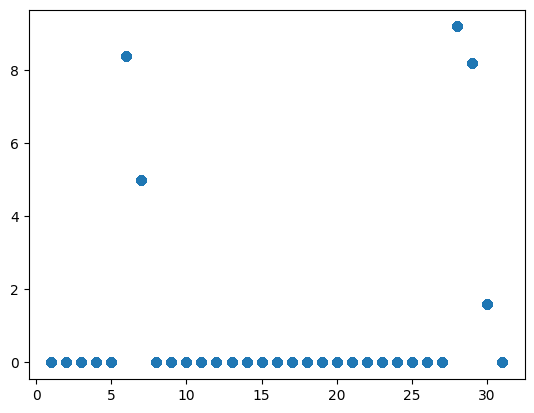

In [19]:
# scatter plot of the snow days in jan 
plt.scatter(df_extra_features_weather['dayofyear_pickup'], df_extra_features_weather['snow'], marker='o')

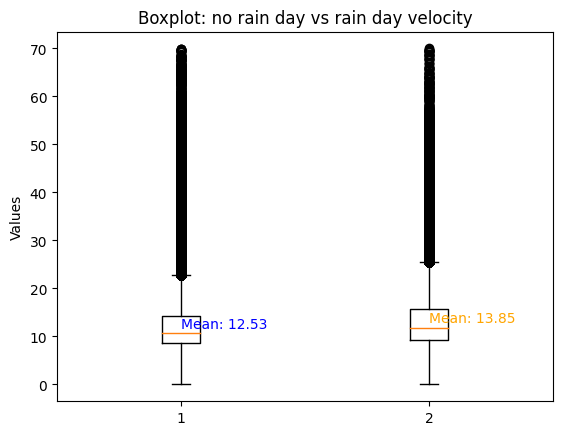

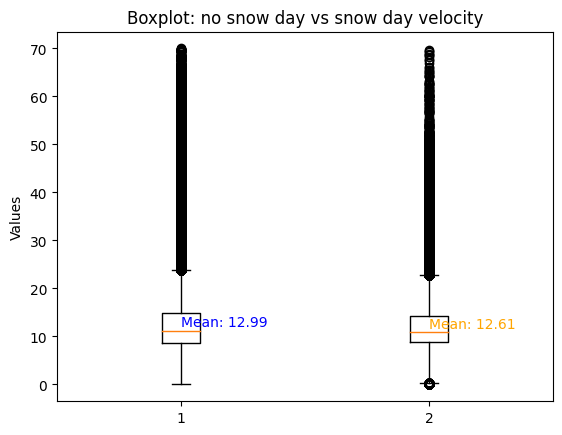

In [28]:
# # plot veloc snowday vs no snowday and rainday vs no rainday 
box_data = [df_extra_features_weather[df_extra_features_weather['precip'] < 0.1]['veloc'], df_extra_features_weather[df_extra_features_weather['precip'] > 0.1]['veloc']]

plt.boxplot(box_data)

plt.text(1, np.mean(box_data[0]), f'Mean: {np.mean(box_data[0]):.2f}', va='center', ha='left', color='blue')
plt.text(2, np.mean(box_data[1]), f'Mean: {np.mean(box_data[1]):.2f}', va='center', ha='left', color='orange')

plt.ylabel('Values')
plt.title('Boxplot: no rain day vs rain day velocity')
plt.show()


box_data = [df_extra_features_weather[df_extra_features_weather['snow'] < 0.1]['veloc'], df_extra_features_weather[df_extra_features_weather['snow'] > 0.1]['veloc']]

plt.boxplot(box_data)

plt.text(1, np.mean(box_data[0]), f'Mean: {np.mean(box_data[0]):.2f}', va='center', ha='left', color='blue')
plt.text(2, np.mean(box_data[1]), f'Mean: {np.mean(box_data[1]):.2f}', va='center', ha='left', color='orange')

plt.ylabel('Values')
plt.title('Boxplot: no snow day vs snow day velocity')
plt.show()

End weather Analysis 

Expo Data Analysis Velocity 

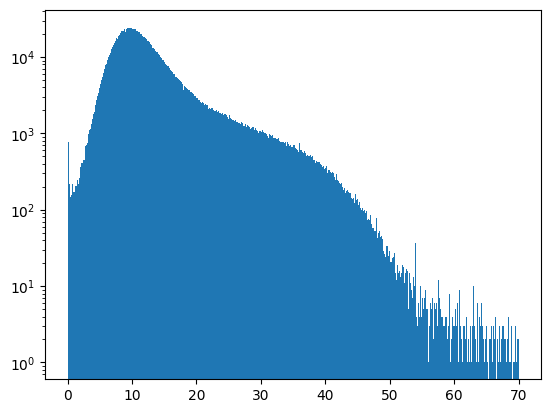

In [29]:
# velc log-distribution 
plt.hist(df_extra_features['veloc'], bins='auto')

plt.yscale('log')
plt.show()

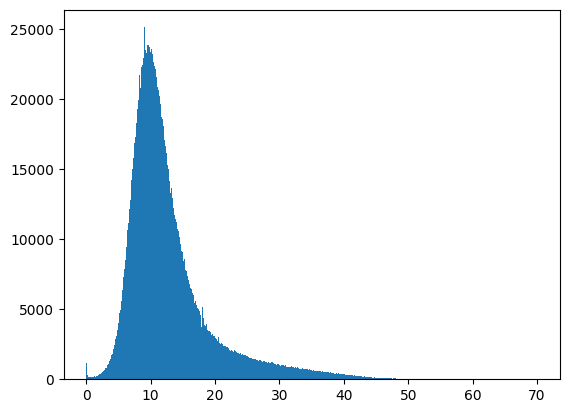

In [32]:
# velc log-distribution 
plt.hist(df_extra_features['veloc'], bins='auto')
plt.show()

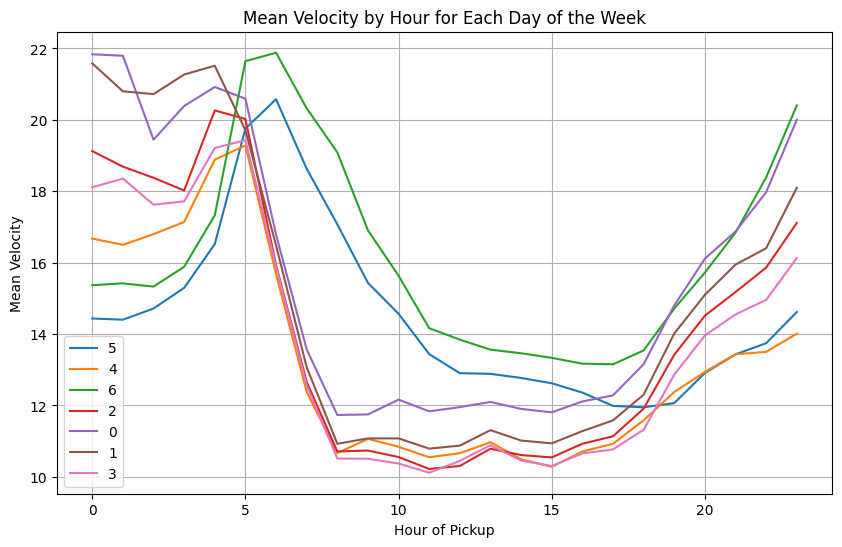

In [30]:
# Plotting mean veloc by hour for each day of the week 
mean_velocity_by_hour = df_extra_features.groupby(['day_of_week_pickup', 'hour_pickup'])['veloc'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over unique days for coloring
for day in df_extra_features['day_of_week_pickup'].unique():
    day_data = mean_velocity_by_hour[mean_velocity_by_hour['day_of_week_pickup'] == day]
    plt.plot(day_data['hour_pickup'], day_data['veloc'], label=day)

plt.title('Mean Velocity by Hour for Each Day of the Week')
plt.xlabel('Hour of Pickup')
plt.ylabel('Mean Velocity')
plt.legend()
plt.grid(True)
plt.show()

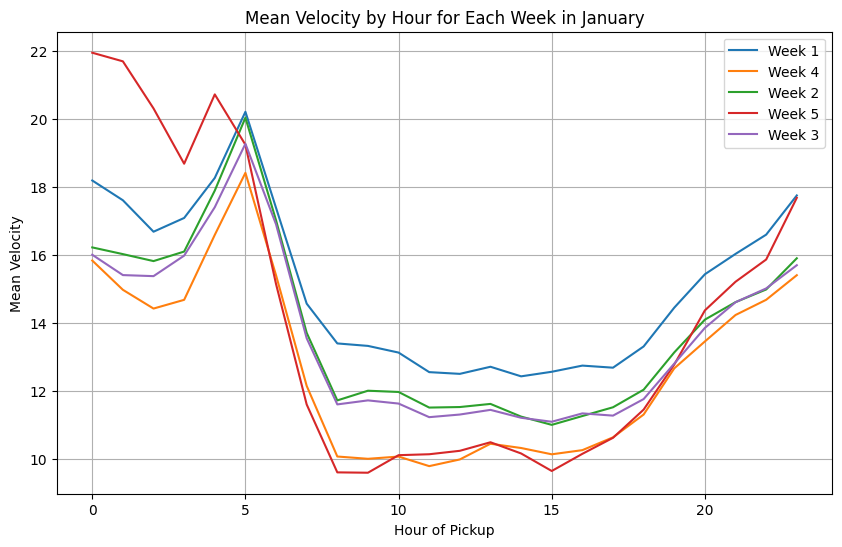

In [50]:
# Plotting mean veloc by hour for each week of Jan
unique_weeks = df_extra_features['week_pickup'].unique()

# Filter rows where 'week_pickup' is in [1, 2, 3, 4, 5]
u_filtered = df_extra_features[df_extra_features['week_pickup'].isin([1, 2, 3, 4, 5])]

# Group by 'week_pickup' and 'hour_pickup' and calculate the mean velocity for each day and hour
mean_velocity_by_hour = u_filtered.groupby(['week_pickup', 'hour_pickup'])['veloc'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))


for week in unique_weeks:
    # Check if the week is in the filtered DataFrame
    if week in u_filtered['week_pickup'].unique():
        week_data = mean_velocity_by_hour[mean_velocity_by_hour['week_pickup'] == week]
        plt.plot(week_data['hour_pickup'], week_data['veloc'], label=f'Week {week}')

plt.title('Mean Velocity by Hour for Each Week in January')
plt.xlabel('Hour of Pickup')
plt.ylabel('Mean Velocity')
plt.legend()
plt.grid(True)
plt.show()